In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sadmandl/final_data.csv
/kaggle/input/sadmandl/pha_map.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/sadmandl/final_data.csv")

In [5]:
y = pd.read_csv("/kaggle/input/sadmandl/pha_map.csv")

In [6]:
df

,H,diameter,albedo,rot_per,e,a,q,i,om,w,ma,ad,n,per,moid_ld
0,3.33,939.400000,0.090000,9.074170,0.0789,2.767,2.549,10.59,80.25,73.42,60.08,2.99,0.2141,1680.0,616.00
1,4.12,513.000000,0.155000,7.813221,0.2302,2.770,2.132,34.93,172.92,310.87,40.60,3.41,0.2138,1680.0,478.00
2,5.16,246.596000,0.214000,7.210000,0.2562,2.669,1.985,12.99,169.84,247.74,37.02,3.35,0.2260,1590.0,403.00
3,3.22,525.400000,0.422800,5.342128,0.0894,2.362,2.151,7.14,103.71,151.66,169.35,2.57,0.2715,1330.0,443.00
4,7.00,106.699000,0.274000,16.806000,0.1874,2.577,2.094,5.36,141.47,359.14,303.40,3.06,0.2383,1510.0,430.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311958,26.23,-31.270931,0.116500,10.355228,0.2989,1.412,0.990,5.87,185.95,139.87,19.31,1.83,0.5876,613.0,9.53
1311959,23.36,-22.712515,0.076847,22.010418,0.2517,1.727,1.292,15.82,190.64,154.93,6.06,2.16,0.4344,829.0,117.00
1311960,18.04,-5.177840,0.090914,25.318527,0.2493,2.424,1.820,5.73,15.03,337.95,252.37,3.03,0.2611,1380.0,318.00
1311961,18.50,-7.014612,0.090800,26.064191,0.2824,2.336,1.676,8.08,355.23,5.25,231.41,3.00,0.2761,1300.0,262.00


In [7]:
y

,pha
0,0
1,0
2,0
3,0
4,0
...,...
1311958,0
1311959,0
1311960,0
1311961,0


In [8]:
X = df.drop(columns=['albedo', 'rot_per', 'e', 'a', 'q', 'om', 'w', 'ma', 'ad'])

In [9]:
X

,H,diameter,i,n,per,moid_ld
0,3.33,939.400000,10.59,0.2141,1680.0,616.00
1,4.12,513.000000,34.93,0.2138,1680.0,478.00
2,5.16,246.596000,12.99,0.2260,1590.0,403.00
3,3.22,525.400000,7.14,0.2715,1330.0,443.00
4,7.00,106.699000,5.36,0.2383,1510.0,430.00
...,...,...,...,...,...,...
1311958,26.23,-31.270931,5.87,0.5876,613.0,9.53
1311959,23.36,-22.712515,15.82,0.4344,829.0,117.00
1311960,18.04,-5.177840,5.73,0.2611,1380.0,318.00
1311961,18.50,-7.014612,8.08,0.2761,1300.0,262.00


# Training with sklearn ANN

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=43)

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 50, 50), max_iter=200)
mlp.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 100, 50, 50))

In [16]:
y_pred = mlp.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
from imblearn.metrics import sensitivity_specificity_support

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261890
           1       0.91      0.71      0.80       503

    accuracy                           1.00    262393
   macro avg       0.95      0.85      0.90    262393
weighted avg       1.00      1.00      1.00    262393



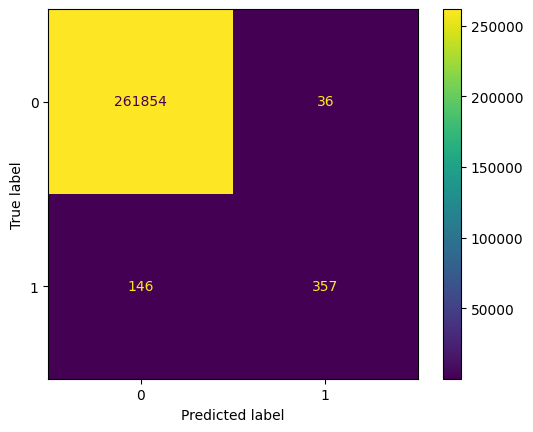

In [20]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp.classes_)
disp.plot()
plt.show()

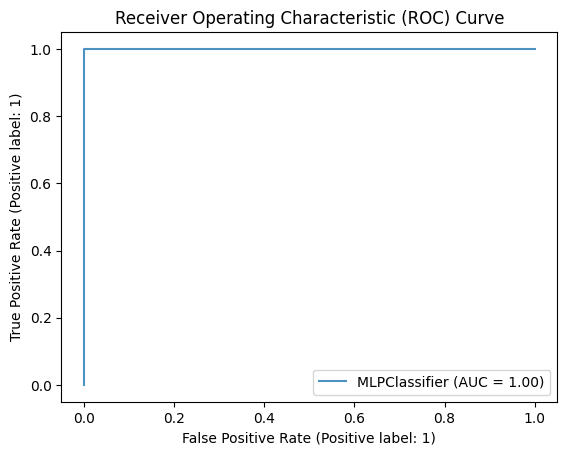

In [21]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(mlp, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [23]:
print(sensitivity_specificity_support(y_test, y_pred, labels=mlp.classes_))

(array([0.99986254, 0.70974155]), array([0.70974155, 0.99986254]), array([261890,    503]))


# Training with Tensorflow ANN

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2024-06-21 13:57:45.385997: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 13:57:45.386096: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 13:57:45.502239: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [51]:
model = Sequential()

model.add(Dense(100,activation='relu',input_dim=6))
model.add(Dense(100,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,161 (145.16 KB)

 Trainable params: 37,161 (145.16 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history = model.fit(X_train,y_train,batch_size=50,epochs=150,verbose=1,validation_split=0.2)

Epoch 1/150
16794/16794 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9975 - loss: 0.0225 - val_accuracy: 0.9981 - val_loss: 0.0103
Epoch 2/150
16794/16794 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.9982 - val_loss: 0.0042
Epoch 3/150
16794/16794 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9989 - loss: 0.0026 - val_accuracy: 0.9989 - val_loss: 0.0022
Epoch 4/150
16794/16794 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9991 - loss: 0.0049 - val_accuracy: 0.9991 - val_loss: 0.0028
Epoch 5/150
16794/16794 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9991 - loss: 0.0143 - val_accuracy: 0.9994 - val_loss: 0.0018
Epoch 6/150
16794/16794 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9991 - loss: 0.0022 - val_accuracy: 0.9987 - val_loss: 0.0029
Epoch 7/150
16794/16794 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9992 - loss: 0.0026 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 8/150
16794/16794 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - ac

In [62]:
y_pred = model.predict(X_test)

8200/8200 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [72]:
y_pred

array([[0.00150396],
       [0.00150396],
       [0.00150396],
       ...,
       [0.00150396],
       [0.00150396],
       [0.00150396]], dtype=float32)

In [73]:
y_pred[y_pred > 0.1]

array([], dtype=float32)

# So, it's classifying every point as 0 because of the imbalance

In [74]:
y_pred = y_pred.argmax(axis=-1)

In [75]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

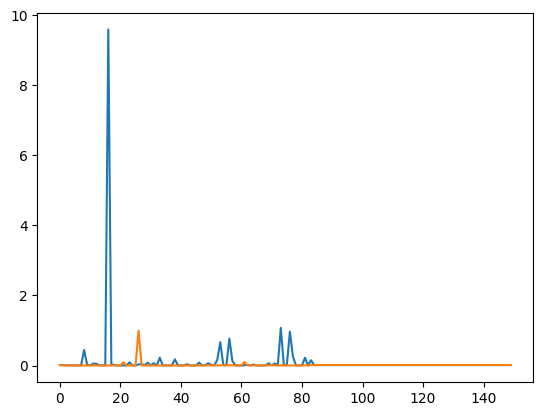

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

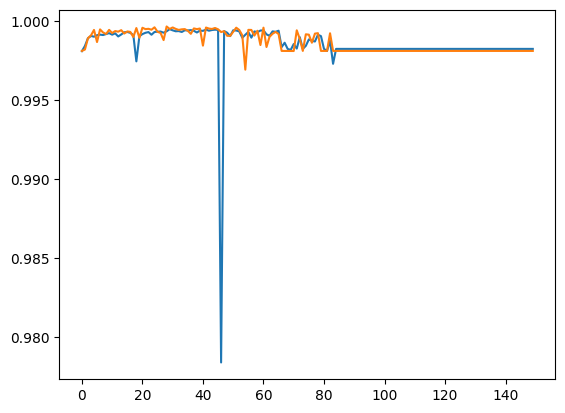

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [78]:
accuracy_score(y_test,y_pred)

0.9980830281295614

In [79]:
confusion_matrix(y_test, y_pred)

array([[261890,      0],
       [   503,      0]])

In [80]:
print(classification_report(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261890
           1       0.00      0.00      0.00       503

    accuracy                           1.00    262393
   macro avg       0.50      0.50      0.50    262393
weighted avg       1.00      1.00      1.00    262393



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


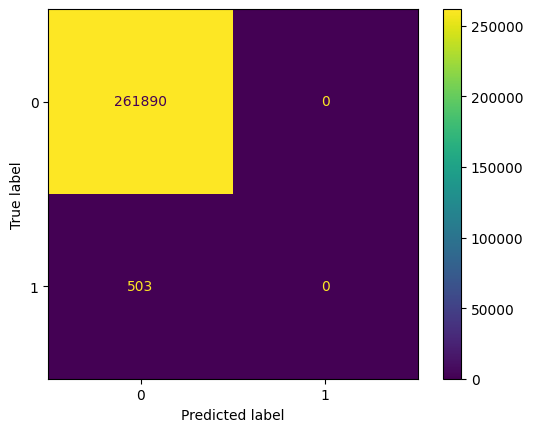

In [81]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()